In [36]:
%matplotlib qt
import mne
import numpy as np
import matplotlib.pyplot as plt
import os

Channels marked as bad: none
Channels marked as bad: none


### Loading data

In [37]:
from mne_bids import (write_raw_bids, BIDSPath, read_raw_bids, print_dir_tree)

bids_root = os.path.join('data', 'P3')
bids_path = BIDSPath(subject='001', session='P3', task='P3',
                     datatype='eeg', suffix='eeg', root=bids_root)

raw = read_raw_bids(bids_path=bids_path)
events, event_id = mne.events_from_annotations(raw)
# ccs_eeg_utils.read_annotations_core(bids_path,raw)

raw.load_data()

Reading /Users/ssaurabh/Projects/eeg-pipeline/data/P3/sub-001/ses-P3/eeg/sub-001_ses-P3_task-P3_eeg.fdt
Reading events from data/P3/sub-001/ses-P3/eeg/sub-001_ses-P3_task-P3_events.tsv.
The event "response" refers to multiple event values. Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    R

<ipython-input-37-b2c5b59a72d9>:7: RuntimeWarning: Data file name in EEG.data (sub-001_task-P3_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-001_ses-P3_task-P3_eeg.fdt).
  raw = read_raw_bids(bids_path=bids_path)


    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renami

<ipython-input-37-b2c5b59a72d9>:7: RuntimeWarning: Participants file not found for sub-001_ses-P3_task-P3_eeg.set... Not reading in any particpants.tsv data.
  raw = read_raw_bids(bids_path=bids_path)


<RawEEGLAB | sub-001_ses-P3_task-P3_eeg.fdt, 33 x 478208 (467.0 s), ~120.4 MB, data loaded>

In [38]:
sfreq = raw.info['sfreq']
data, times = raw[:5, int(sfreq * 1):int(sfreq * 460)]
_ = plt.plot(times, data.T)
_ = plt.title('Sample channels')

### Information

In [39]:
n_time_samps = raw.n_times
time_secs = raw.times
ch_names = raw.ch_names
n_chan = len(ch_names)  # note: there is no raw.n_channels attribute
print('the (cropped) sample data object has {} time samples and {} channels.'
      ''.format(n_time_samps, n_chan))
print('The last time sample is at {} seconds.'.format(time_secs[-1]))
print('The first few channel names are {}....'.format(', '.join(ch_names[:5])))
# Give the sample rate
print('sample rate:', raw.info['sfreq'], 'Hz')
# Give the size of the data matrix
print('%s channels x %s samples' % (len(raw), len(raw.times)))
print(ch_names)

the (cropped) sample data object has 478208 time samples and 33 channels.
The last time sample is at 466.9990234375 seconds.
The first few channel names are FP1, F3, F7, FC3, C3....
sample rate: 1024.0 Hz
478208 channels x 478208 samples
['FP1', 'F3', 'F7', 'FC3', 'C3', 'C5', 'P3', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Oz', 'Pz', 'CPz', 'FP2', 'Fz', 'F4', 'F8', 'FC4', 'FCz', 'Cz', 'C4', 'C6', 'P4', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'HEOG_left', 'HEOG_right', 'VEOG_lower']


### Since, P300 lets see Pz channel 

In [40]:
eeg_channel_indices = mne.pick_channels(raw.ch_names, ['Pz'])

start_stop_seconds = np.array([11, 13])
start_sample, stop_sample = (start_stop_seconds * sfreq).astype(int)

eeg_data, times = raw[eeg_channel_indices, start_sample:stop_sample]
print(eeg_data)

import seaborn as sns
plt.plot(times, eeg_data.T)
# plt.plot(eeg_data[1], eeg_data[0].T)

[[0.00359457 0.00359495 0.00359626 ... 0.00360498 0.00360623 0.0036076 ]]


### Display Montage settings

In [41]:
import seaborn as sns
# sns.lineplot(data=eeg_data, x=0, y=1)
montage_dir = os.path.join(os.path.dirname(mne.__file__),
                           'channels', 'data', 'montages')

print('\nBUILT-IN MONTAGE FILES')
print('======================')
print(sorted(os.listdir(montage_dir)))
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

raw.set_montage(ten_twenty_montage, match_case=False)
print(ten_twenty_montage)

fig = plt.figure()
ax2d = fig.add_subplot(121)
ax3d = fig.add_subplot(122, projection='3d')
raw.plot_sensors(ch_type='eeg', axes=ax2d)
raw.plot_sensors(ch_type='eeg', axes=ax3d, kind='3d')
ax3d.view_init(azim=70, elev=15)


BUILT-IN MONTAGE FILES
['EGI_256.csd', 'GSN-HydroCel-128.sfp', 'GSN-HydroCel-129.sfp', 'GSN-HydroCel-256.sfp', 'GSN-HydroCel-257.sfp', 'GSN-HydroCel-32.sfp', 'GSN-HydroCel-64_1.0.sfp', 'GSN-HydroCel-65_1.0.sfp', 'artinis-brite23.elc', 'artinis-octamon.elc', 'biosemi128.txt', 'biosemi16.txt', 'biosemi160.txt', 'biosemi256.txt', 'biosemi32.txt', 'biosemi64.txt', 'easycap-M1.txt', 'easycap-M10.txt', 'mgh60.elc', 'mgh70.elc', 'standard_1005.elc', 'standard_1020.elc', 'standard_alphabetic.elc', 'standard_postfixed.elc', 'standard_prefixed.elc', 'standard_primed.elc']
<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.
4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


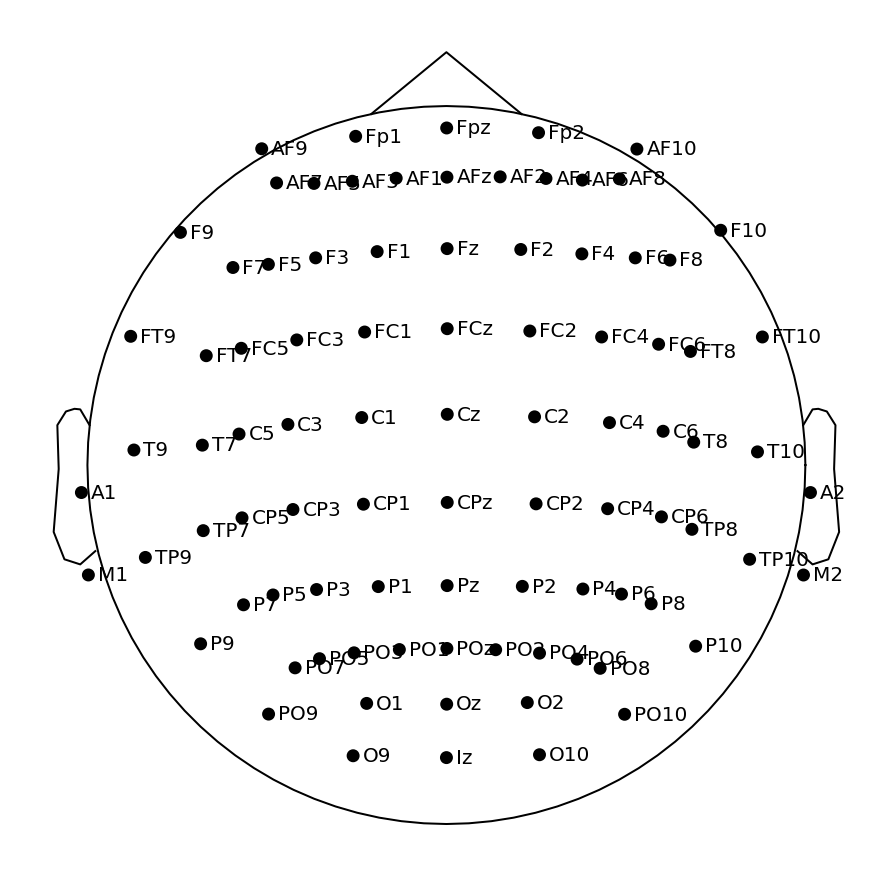

In [42]:
fig = ten_twenty_montage.plot(kind='3d')
fig.gca().view_init(azim=70, elev=15)
ten_twenty_montage.plot(kind='topomap', show_names=True)

### Filtering

In [43]:
raw.resample(300, npad="auto")
raw.filter(0.5, 50, fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)



<RawEEGLAB | sub-001_ses-P3_task-P3_eeg.fdt, 33 x 140100 (467.0 s), ~35.3 MB, data loaded>

## Removing muscle artifact

In [44]:
# The threshold is data dependent, check the optimal threshold by plotting
# ``scores_muscle``.
threshold_muscle = 25  # z-score
# Choose one channel type, if there are axial gradiometers and magnetometers,
# select magnetometers as they are more sensitive to muscle activity.
annot_muscle, scores_muscle = mne.preprocessing.annotate_muscle_zscore(
    raw, ch_type="eeg", threshold=threshold_muscle, min_length_good=0.2,
    filter_freq=[110, 140])

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.1e+02 - 1.4e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 110.00
- Lower transition bandwidth: 27.50 Hz (-6 dB cutoff frequency: 96.25 Hz)
- Upper passband edge: 140.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 145.00 Hz)
- Filter length: 99 samples (0.330 sec)

Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 495 samples (1.650 sec)



In [45]:
fig, ax = plt.subplots()
ax.plot(raw.times, scores_muscle)
ax.axhline(y=threshold_muscle, color='r')
ax.set(xlabel='time, (s)', ylabel='zscore', title='Muscle activity')

[Text(0.5, 0, 'time, (s)'),
 Text(0, 0.5, 'zscore'),
 Text(0.5, 1.0, 'Muscle activity')]

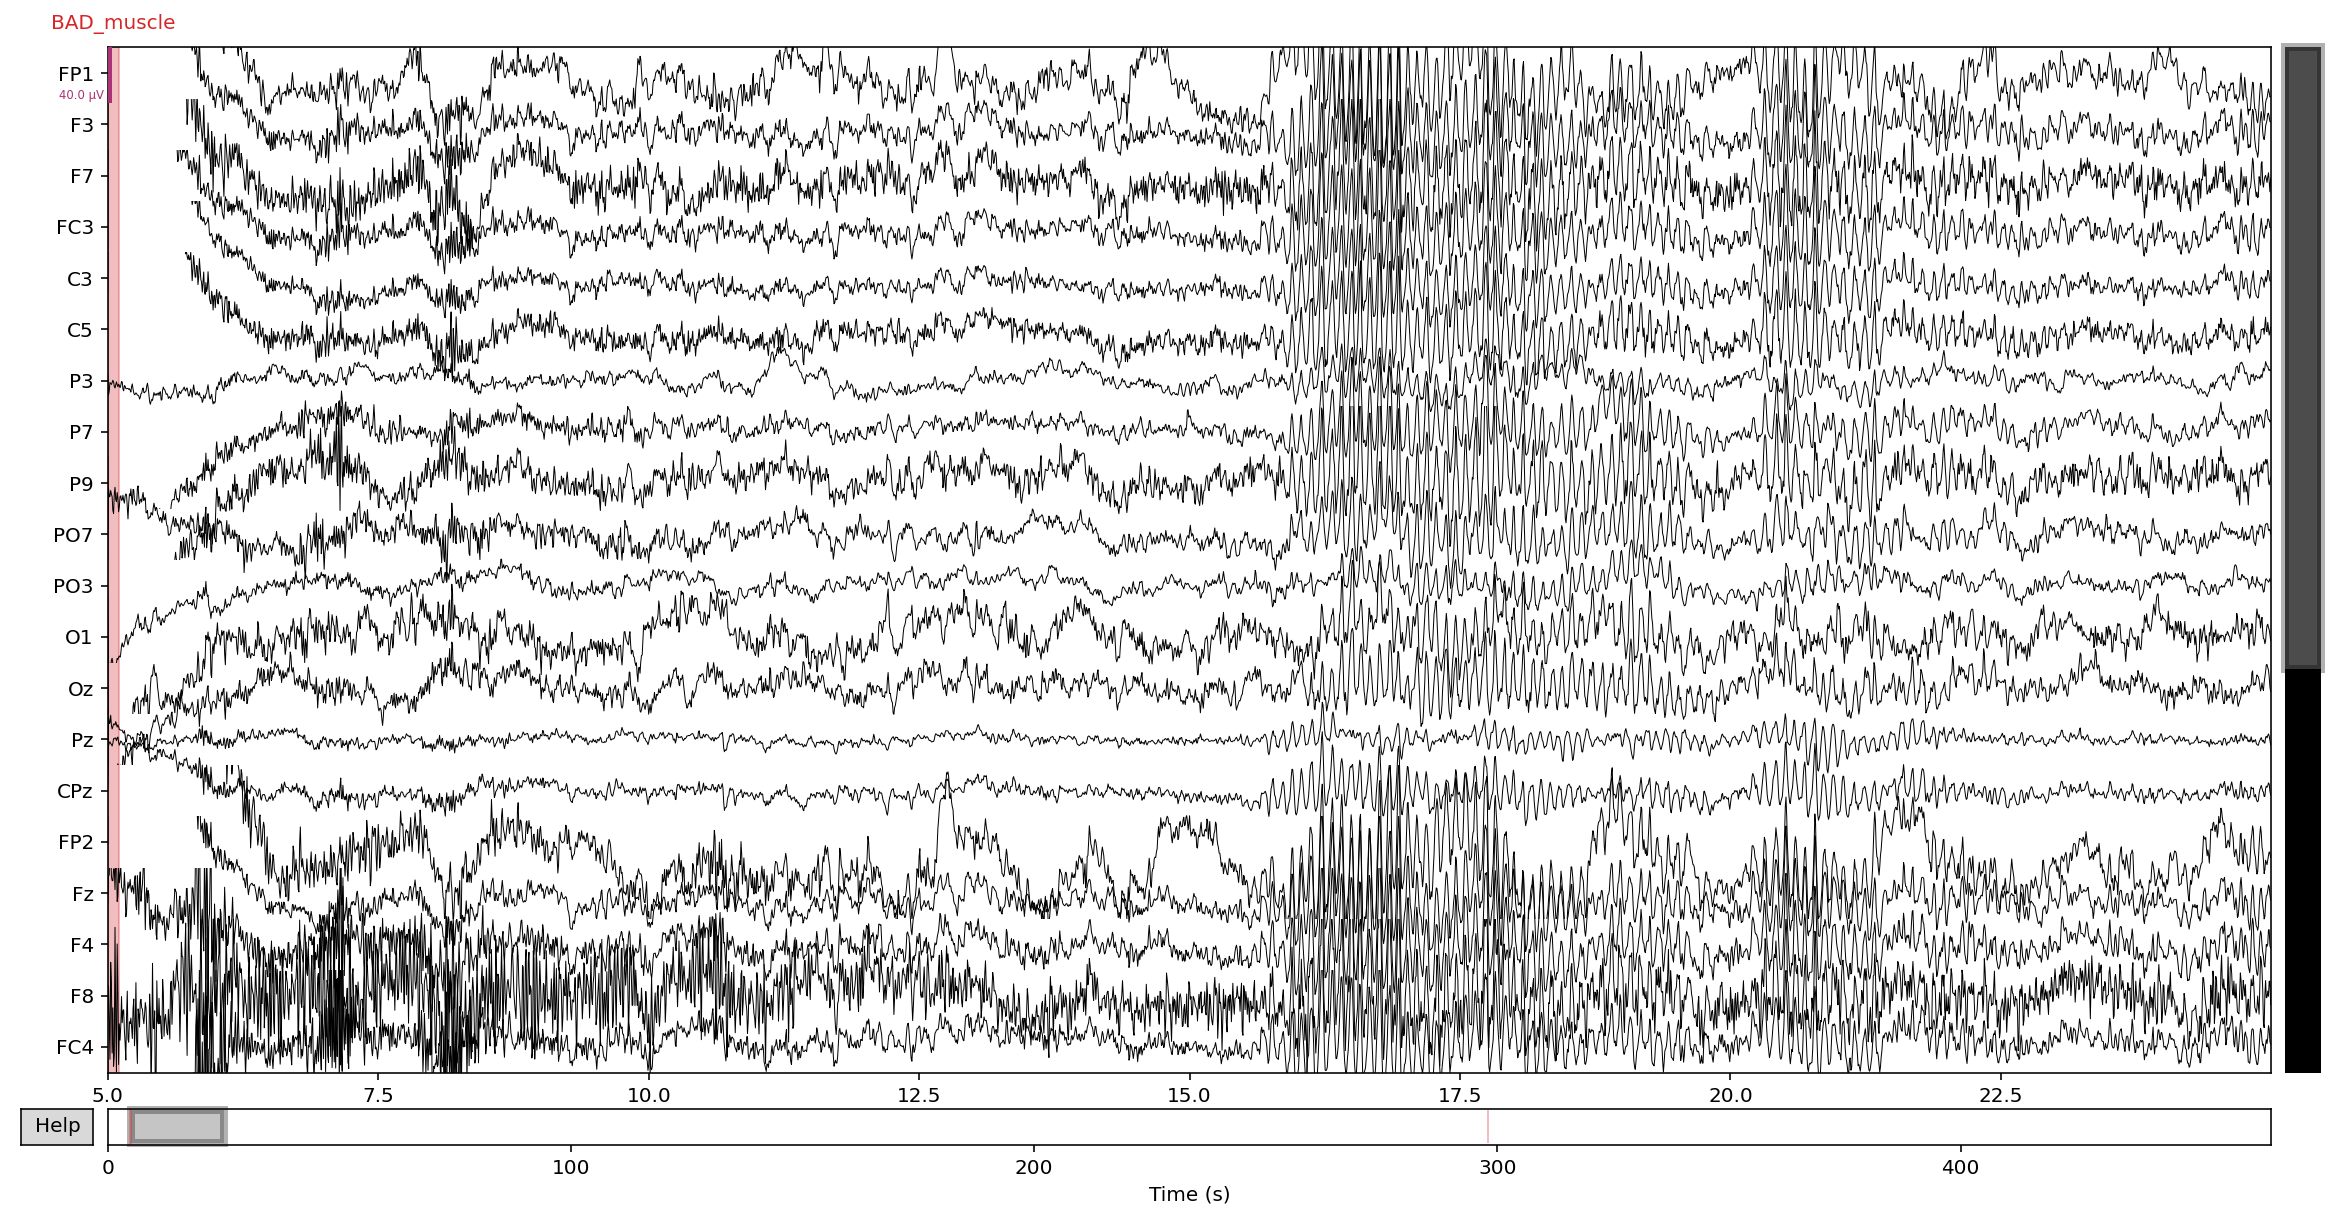

In [46]:
order = np.arange(144, 164)
nraw = raw.copy()
nraw.set_annotations(annot_muscle)
nraw.plot(start=5, duration=20)

In [47]:
eog_events = mne.preprocessing.find_eog_events(raw)
onsets = eog_events[:, 0] / raw.info['sfreq'] - 0.25
durations = [0.5] * len(eog_events)
descriptions = ['bad blink'] * len(eog_events)
blink_annot = mne.Annotations(onsets, durations, descriptions,
                              orig_time=raw.info['meas_date'])
raw.set_annotations(blink_annot)

Using EOG channels: HEOG_left, HEOG_right, VEOG_lower
EOG channel index for this subject is: [30 31 32]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 13 significant peaks
Number of EOG events detected: 13


<RawEEGLAB | sub-001_ses-P3_task-P3_eeg.fdt, 33 x 140100 (467.0 s), ~35.3 MB, data loaded>

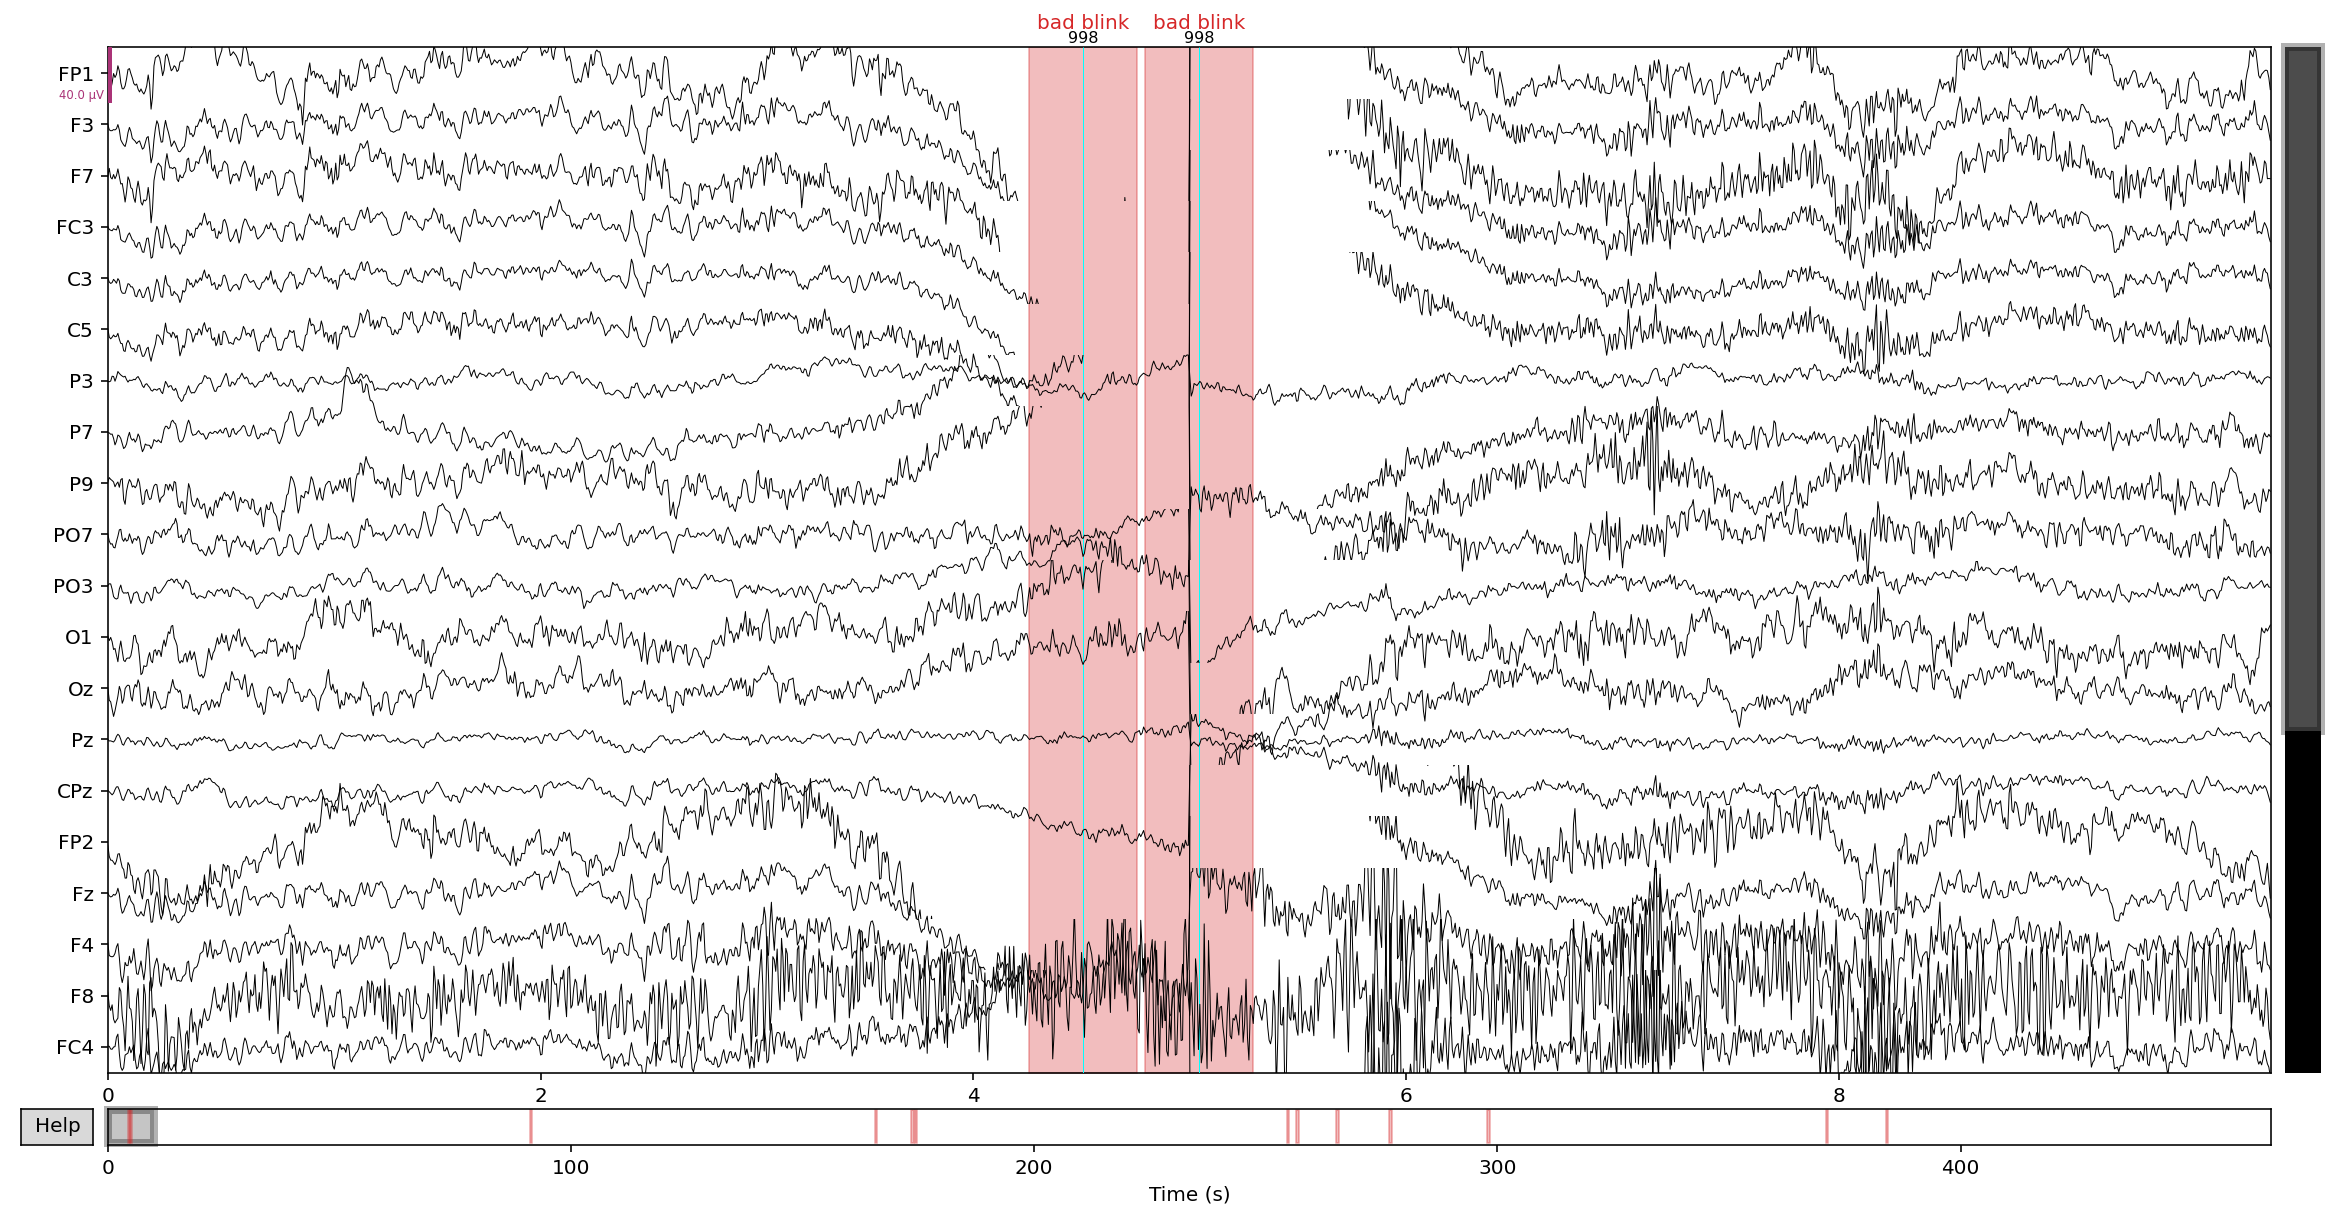

In [48]:
eeg_picks = mne.pick_types(raw.info, meg=False, eeg=True)
raw.plot(events=eog_events, order=eeg_picks)

Not setting metadata
Not setting metadata
402 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 402 events and 211 original time points ...
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'F8']
    Rejecting  epoch based on EEG : ['F4', 'F8']
    Rejecting  epoch based on EEG : ['FP1', 'F3', 'F7', 'FP2', 'Fz', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['FP1', 'F7', 'FP2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['FP2', 'F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['FP1', 'F7', 'FP2', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting

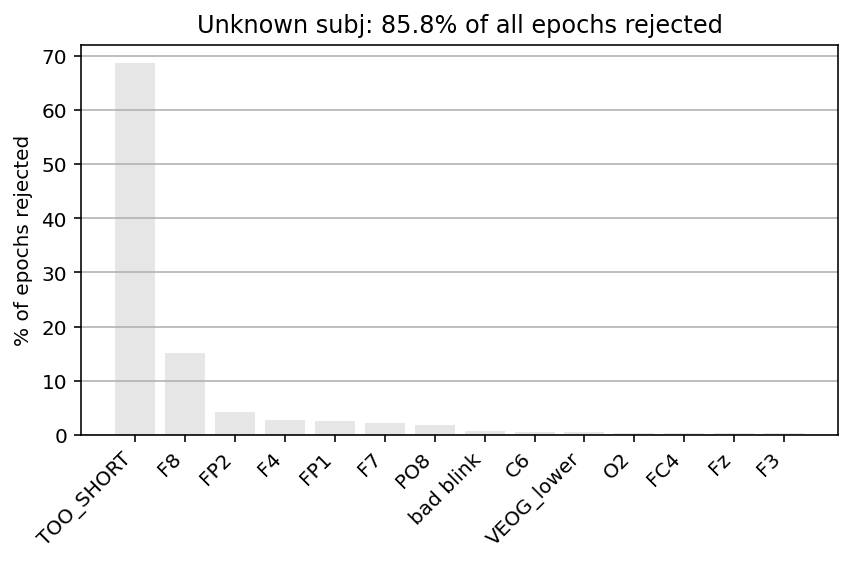

In [49]:
reject_criteria = dict(eeg=100e-6,       # 100 µV
                       eog=200e-6)       # 200 µV

flat_criteria = dict(eeg=1e-6)           # 1 µV
epochs = mne.Epochs(raw, events, tmin=-0.2, tmax=0.5, reject_tmax=0,
                    reject=reject_criteria, flat=flat_criteria, preload=True)
epochs.plot_drop_log()

### ICA

Fitting ICA to data using 30 channels (please be patient, this may take a while)
Omitting 1950 of 140100 (1.39%) samples, retaining 138150 (98.61%) samples.
Selecting by non-zero PCA components: 30 components


<ipython-input-50-062c5c0212ed>:1: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ICA(method="fastica")


Fitting ICA took 1.6s.
Using EOG channels: HEOG_left, HEOG_right, VEOG_lower
Omitting 1950 of 140100 (1.39%) samples, retaining 138150 (98.61%) samples.
Omitting 1950 of 140100 (1.39%) samples, retaining 138150 (98.61%) samples.
Omitting 1950 of 140100 (1.39%) samples, retaining 138150 (98.61%) samples.
Omitting 1950 of 140100 (1.39%) samples, retaining 138150 (98.61%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
-------------------

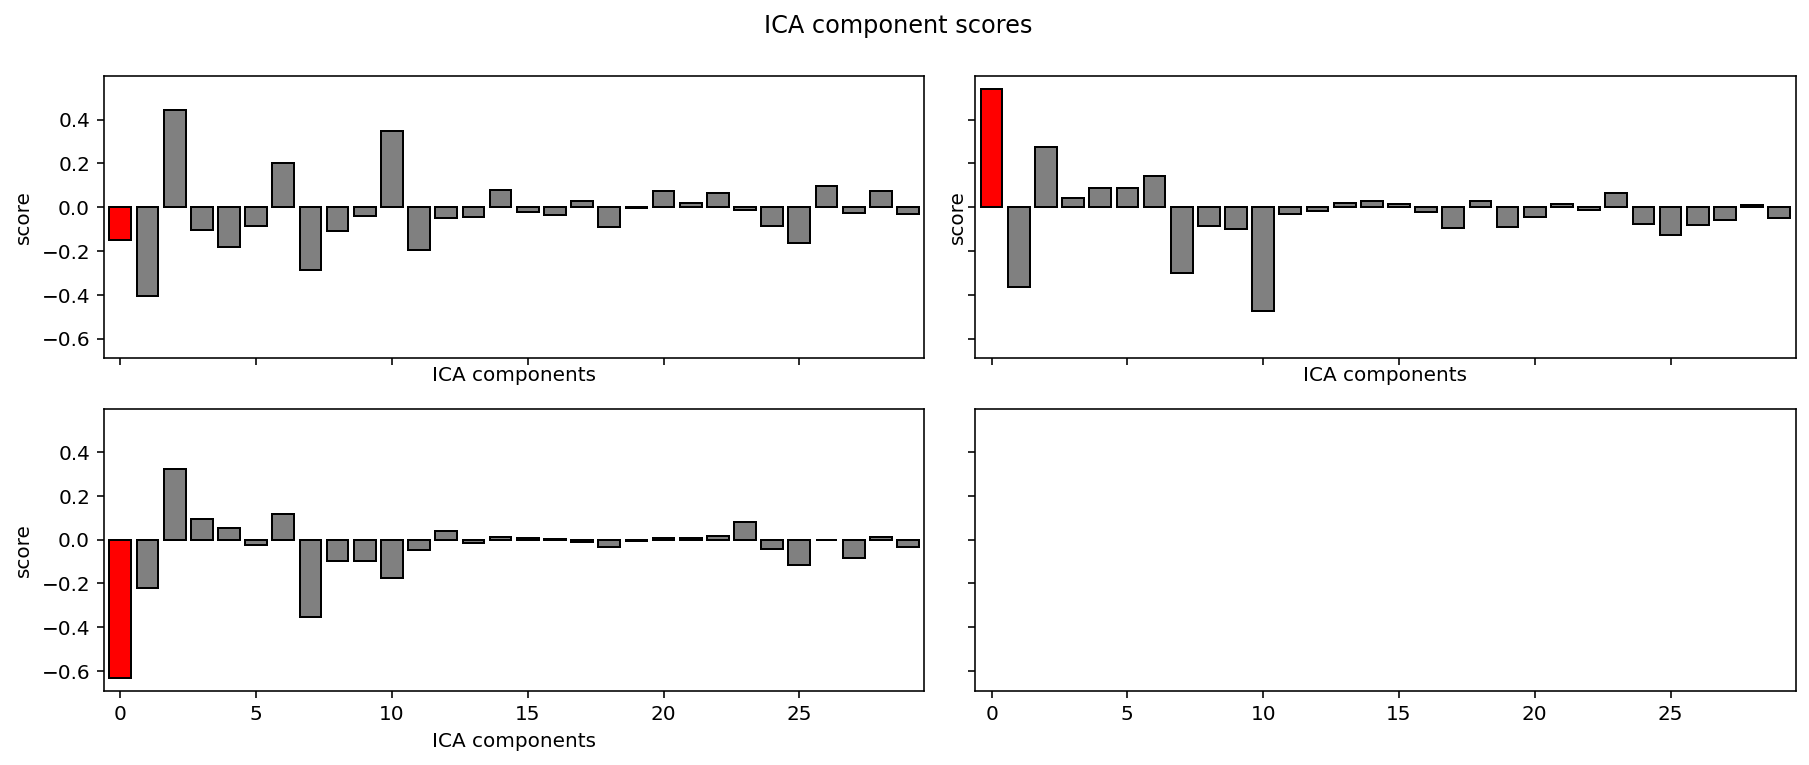

In [50]:
ica = mne.preprocessing.ICA(method="fastica")
ica.fit(raw,decim=3, verbose=True)
eog_indices, eog_scores = ica.find_bads_eog(raw)
ica.exclude = eog_indices

# barplot of ICA component "EOG match" scores
ica.plot_scores(eog_scores, exclude=eog_indices)

Creating RawArray with float64 data, n_channels=33, n_times=140100
    Range : 0 ... 140099 =      0.000 ...   466.997 secs
Ready.


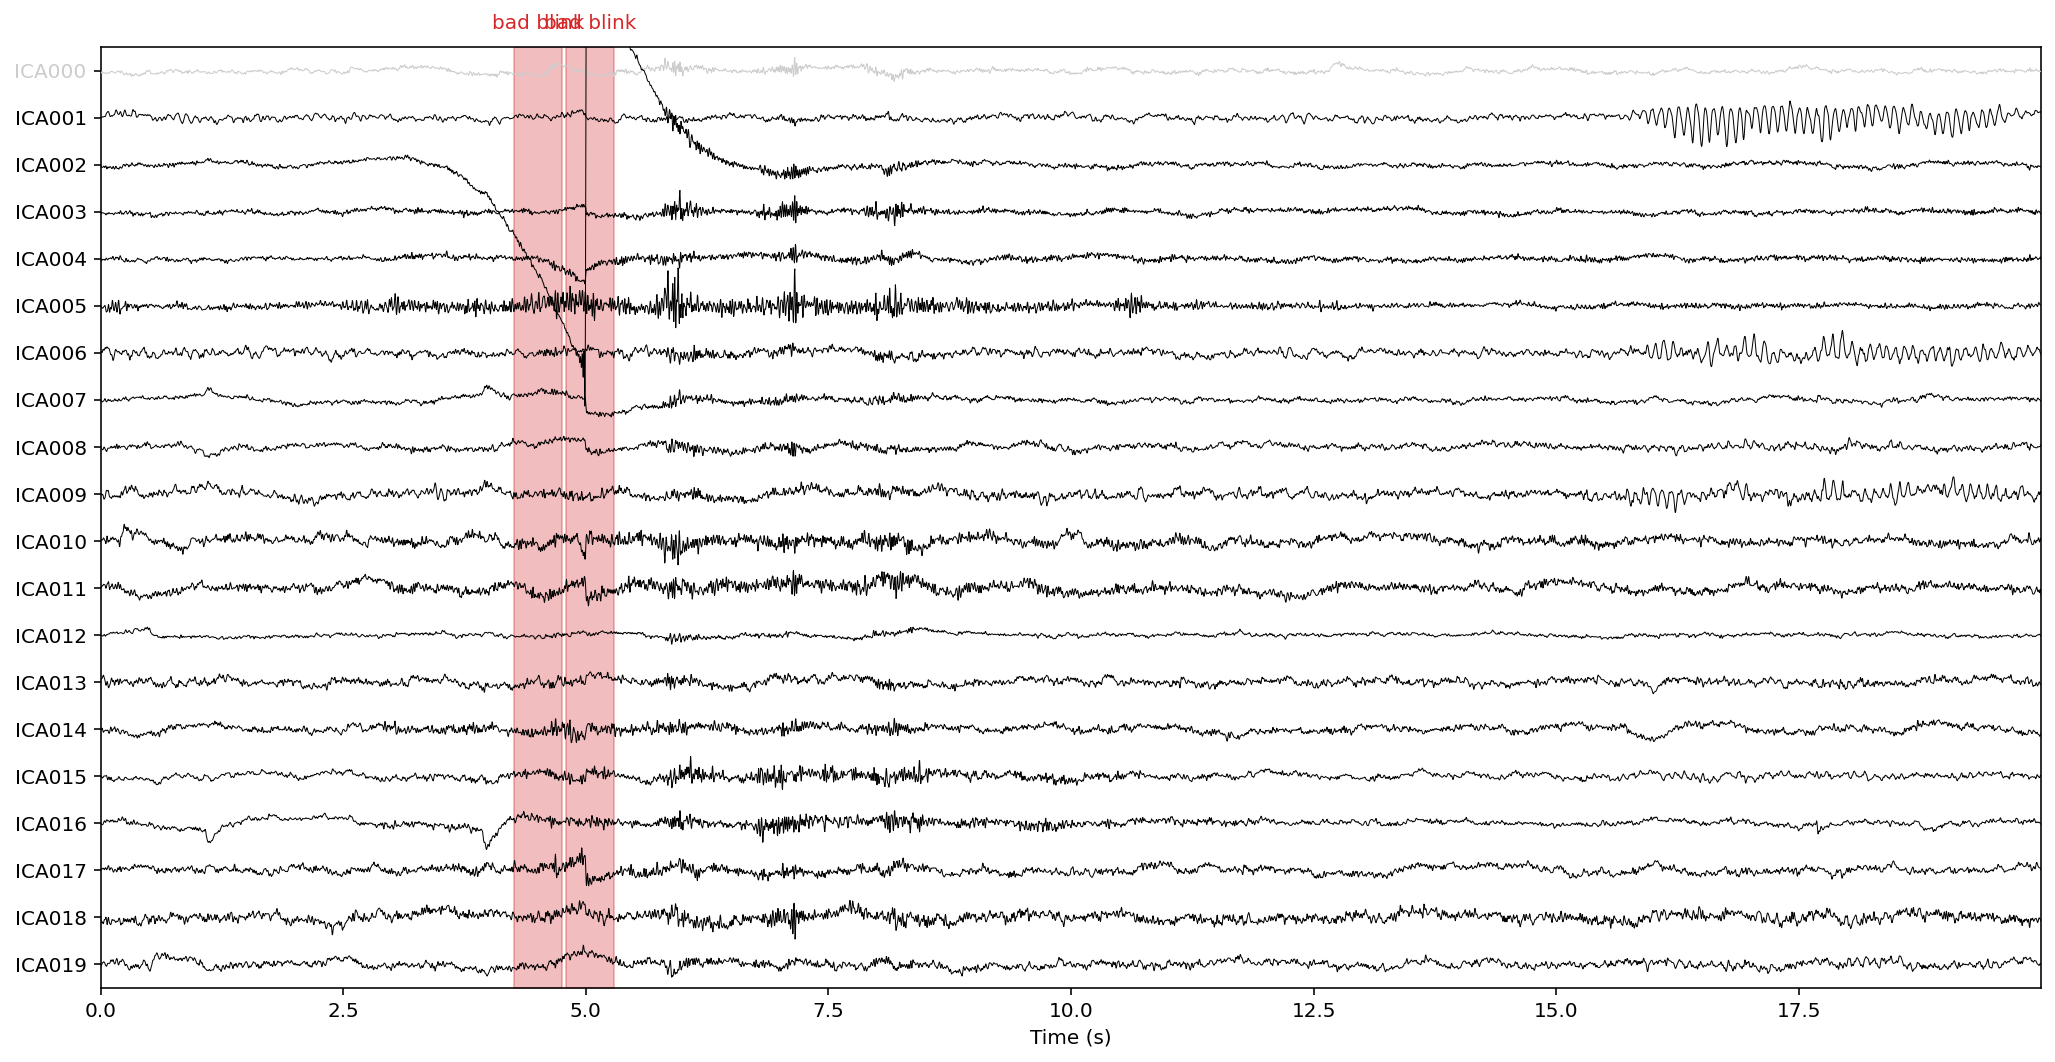

In [51]:
ica.plot_sources(raw, show_scrollbars=False)

In [52]:
mne.viz.plot_events(events, event_id=event_id, sfreq=raw.info['sfreq']);

<ipython-input-52-2b5711b7ac18>:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events, event_id=event_id, sfreq=raw.info['sfreq']);


Using EOG channels: HEOG_left, HEOG_right, VEOG_lower
EOG channel index for this subject is: [30 31 32]
Omitting 1950 of 140100 (1.39%) samples, retaining 138150 (98.61%) samples.
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 18 significant peaks
Number of EOG events detected: 18
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
Loading data for 18 events and 301 or

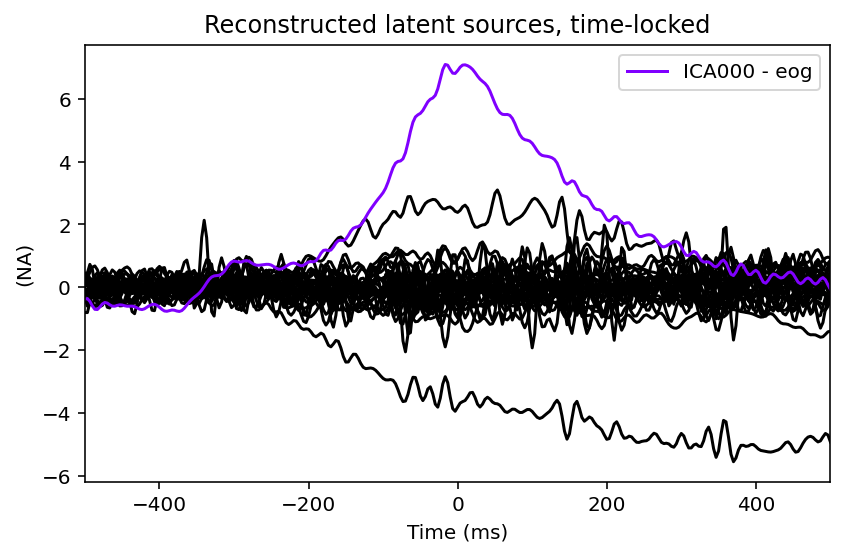

In [53]:
eog_evoked = mne.preprocessing.create_eog_epochs(raw).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot_joint()
# plot ICs applied to the averaged EOG epochs, with EOG matches highlighted
ica.plot_sources(eog_evoked)

Using EOG channels: HEOG_left, HEOG_right, VEOG_lower
Omitting 1950 of 140100 (1.39%) samples, retaining 138150 (98.61%) samples.
Omitting 1950 of 140100 (1.39%) samples, retaining 138150 (98.61%) samples.
Omitting 1950 of 140100 (1.39%) samples, retaining 138150 (98.61%) samples.
Omitting 1950 of 140100 (1.39%) samples, retaining 138150 (98.61%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass

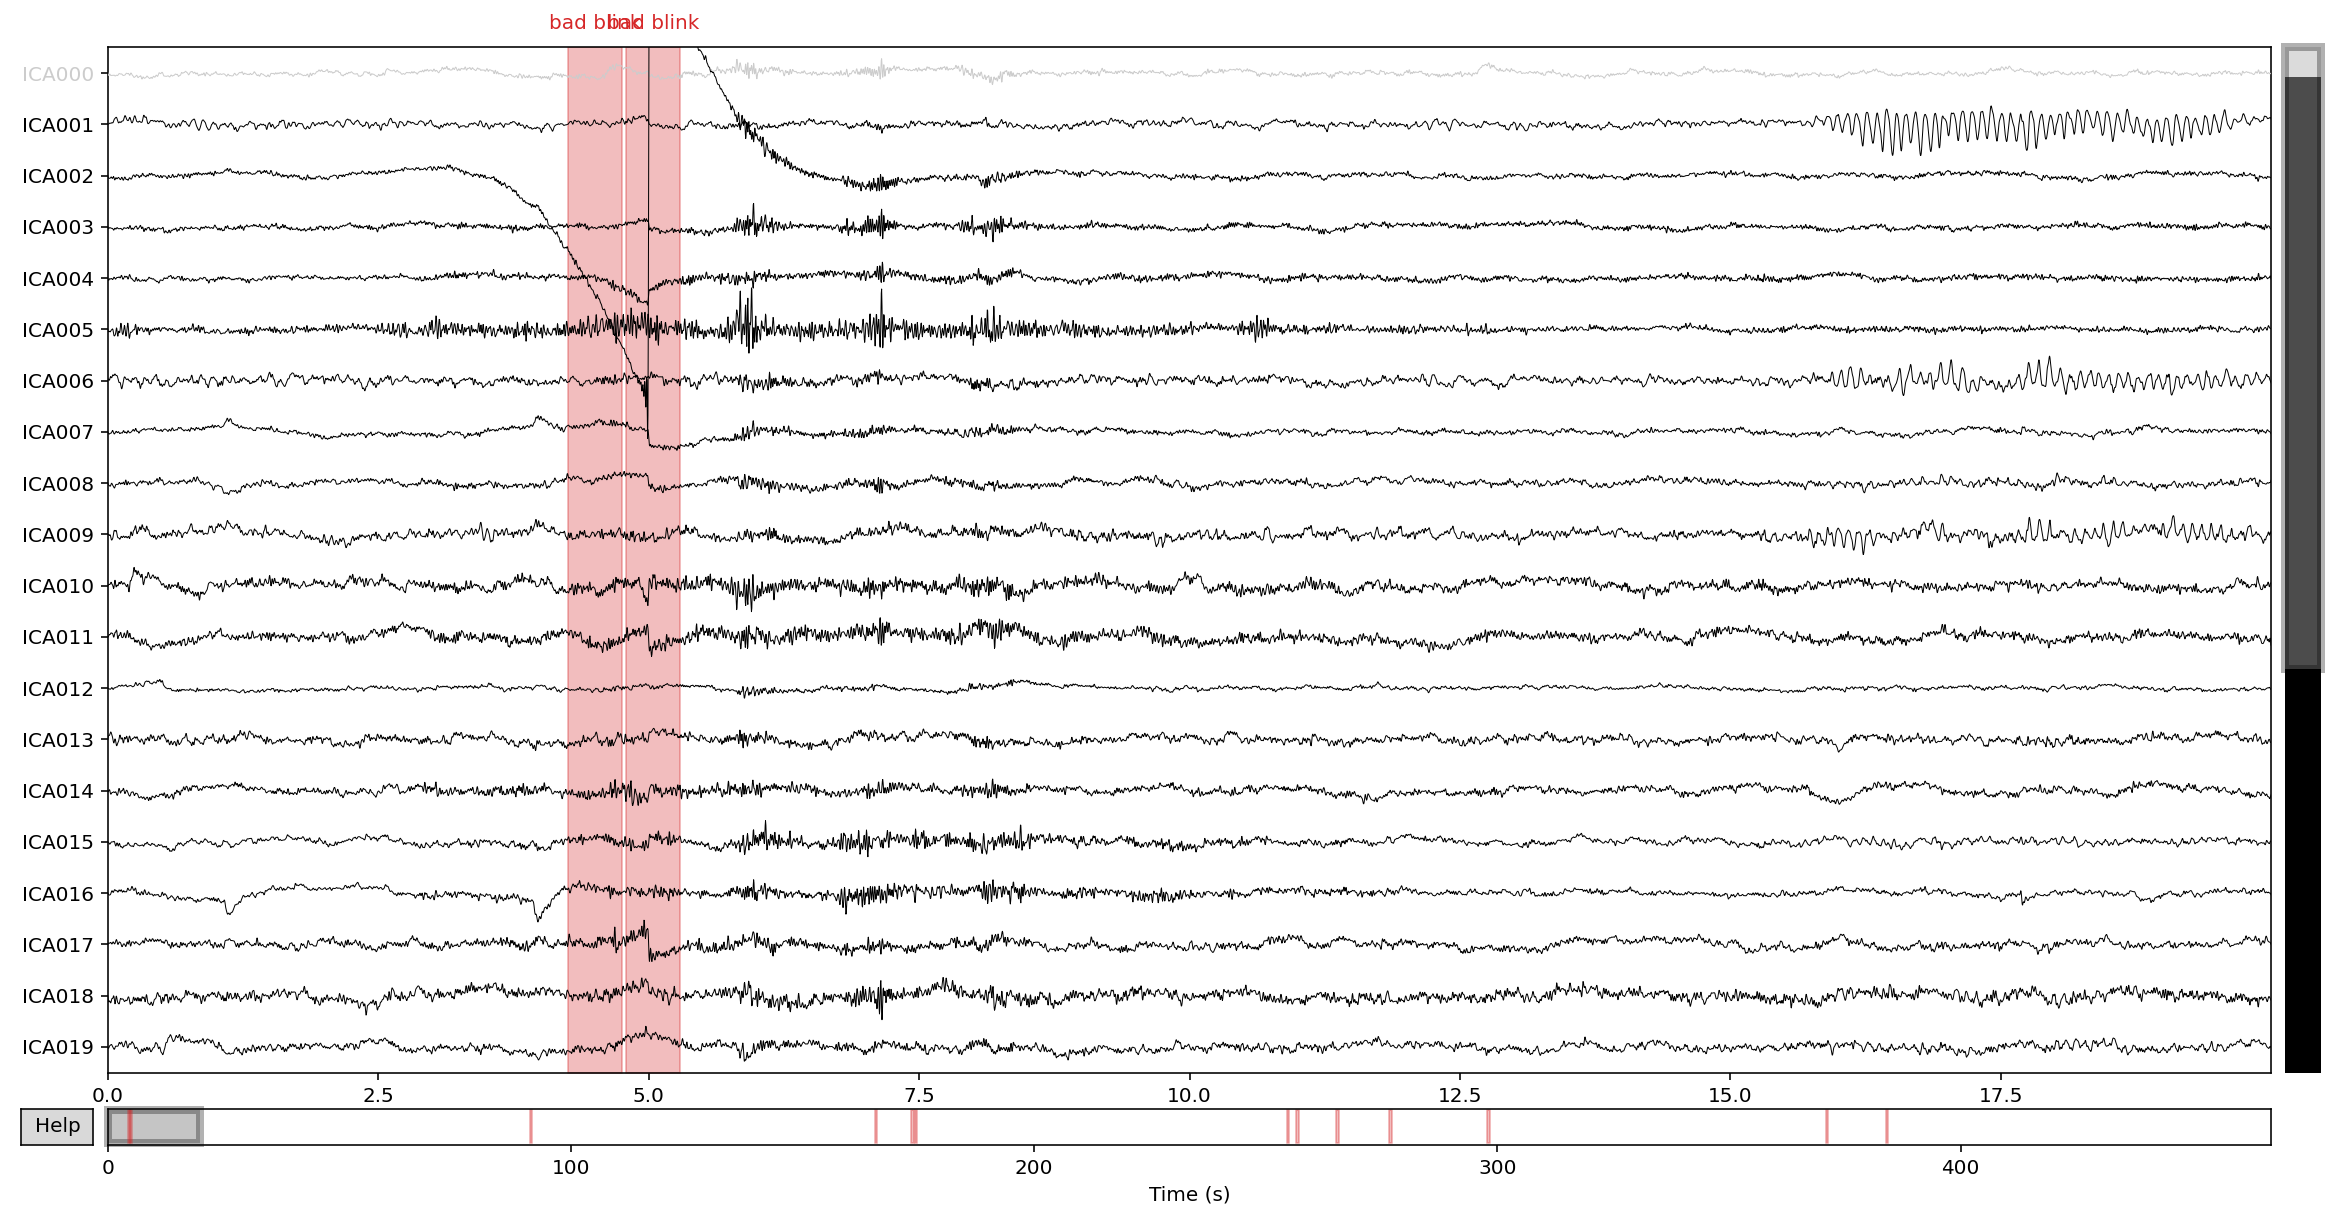

In [54]:
ica.exclude = []
# find which ICs match the EOG pattern
eog_indices, eog_scores = ica.find_bads_eog(raw)
ica.exclude = eog_indices

# barplot of ICA component "EOG match" scores
ica.plot_scores(eog_scores)

# plot diagnostics
# ica.plot_properties(raw, picks=eog_indices)

# plot ICs applied to raw data, with EOG matches highlighted
ica.plot_sources(raw, show_scrollbars=True)


# ica.plot_overlay(raw, exclude=eog_indices, picks='eeg')

In [55]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw)  # get single EOG trials
eog_inds, scores = ica.find_bads_eog(eog_epochs)  # find via correlation

ica.plot_scores(scores, exclude=eog_inds);  # look at r scores of components

Using EOG channels: HEOG_left, HEOG_right, VEOG_lower
EOG channel index for this subject is: [30 31 32]
Omitting 1950 of 140100 (1.39%) samples, retaining 138150 (98.61%) samples.
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 18 significant peaks
Number of EOG events detected: 18
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
Loading data for 18 events and 301 or

In [56]:
from time import time
def run_ica(method, fit_params=None):
    ica = mne.preprocessing.ICA(n_components=20, method=method, fit_params=fit_params,
              max_iter='auto', random_state=35)
    t0 = time()
    ica.fit(nraw)
    fit_time = time() - t0
    title = ('ICA decomposition using %s (took %.1fs)' % (method, fit_time))
    ica.plot_components(title=title)

In [57]:
run_ica('fastica')

Fitting ICA to data using 30 channels (please be patient, this may take a while)
Omitting 85 of 140100 (0.06%) samples, retaining 140015 (99.94%) samples.
Selecting by number: 20 components
Fitting ICA took 3.0s.


In [58]:
run_ica('picard')

Fitting ICA to data using 30 channels (please be patient, this may take a while)
Omitting 85 of 140100 (0.06%) samples, retaining 140015 (99.94%) samples.
Selecting by number: 20 components
Fitting ICA took 5.1s.


In [59]:
run_ica('infomax')

Fitting ICA to data using 30 channels (please be patient, this may take a while)
Omitting 85 of 140100 (0.06%) samples, retaining 140015 (99.94%) samples.
Selecting by number: 20 components
 


/opt/anaconda3/envs/eeg-pipeline/lib/python3.9/site-packages/mne/preprocessing/infomax_.py:192: RuntimeWarning: overflow encountered in exp
  y = 1.0 / (1.0 + np.exp(-u))


Fitting ICA took 19.6s.


Setting 1950 of 140100 (1.39%) samples to NaN, retaining 138150 (98.61%) samples.
Effective window size : 6.827 (s)


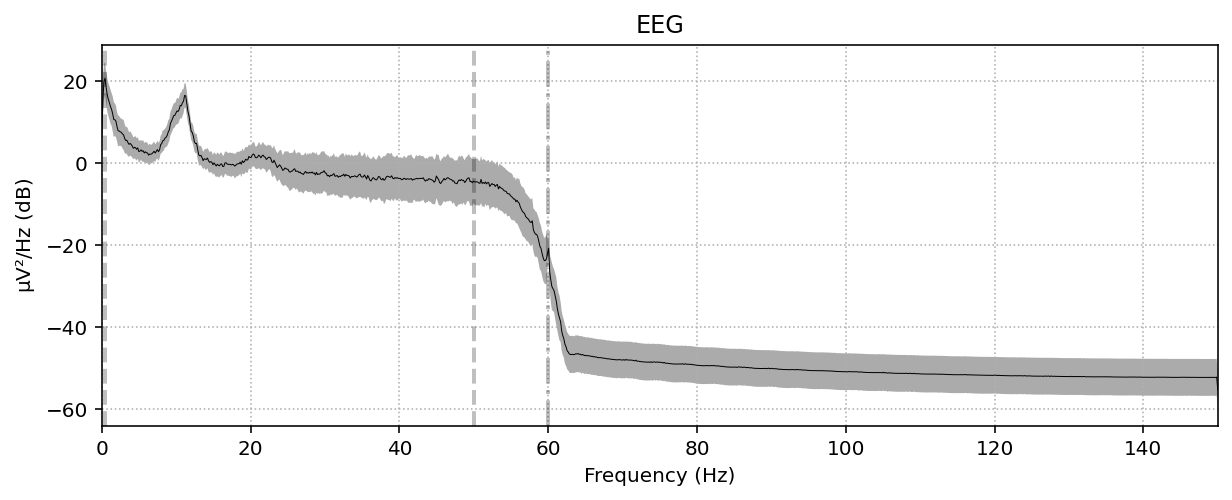

In [60]:
raw.plot_psd(average=True)

### EPOCHING

In [61]:
epochs = mne.Epochs(raw, events, event_id, tmin=-0.1, tmax=1,
                    baseline=(None, 0), preload=True)
print(epochs)

Not setting metadata
Not setting metadata
402 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 402 events and 331 original time points ...
281 bad epochs dropped
<Epochs |  121 events (all good), -0.1 - 1 sec, baseline -0.1 – 0 sec, ~10.1 MB, data loaded,
 'response/201': 59
 'response/202': 3
 'stimulus/11': 7
 'stimulus/12': 9
 'stimulus/13': 7
 'stimulus/14': 12
 'stimulus/15': 3
 'stimulus/21': 0
 'stimulus/22': 0
 'stimulus/23': 0
 'stimulus/24': 0
 'stimulus/25': 0
 'stimulus/31': 0
 'stimulus/32': 0
 'stimulus/33': 0
 'stimulus/34': 0
 'stimulus/35': 0
 'stimulus/41': 4
 'stimulus/42': 3
 'stimulus/43': 2
 'stimulus/44': 6
 'stimulus/45': 6
 'stimulus/51': 0
 'stimulus/52': 0
 'stimulus/53': 0
 'stimulus/54': 0
 'stimulus/55': 0>


In [62]:
print(epochs.events[:3])
print(epochs.event_id)

[[ 9852     0     2]
 [15488     0     2]
 [19878     0     3]]
{'response/201': 1, 'response/202': 2, 'stimulus/11': 3, 'stimulus/12': 4, 'stimulus/13': 5, 'stimulus/14': 6, 'stimulus/15': 7, 'stimulus/21': 8, 'stimulus/22': 9, 'stimulus/23': 10, 'stimulus/24': 11, 'stimulus/25': 12, 'stimulus/31': 13, 'stimulus/32': 14, 'stimulus/33': 15, 'stimulus/34': 16, 'stimulus/35': 17, 'stimulus/41': 18, 'stimulus/42': 19, 'stimulus/43': 20, 'stimulus/44': 21, 'stimulus/45': 22, 'stimulus/51': 23, 'stimulus/52': 24, 'stimulus/53': 25, 'stimulus/54': 26, 'stimulus/55': 27}


In [63]:
print(epochs[1:5])
print(epochs['stimulus/11'])
print(epochs['stimulus/21'])
print(epochs['stimulus/31'])
print(epochs['response'])

<Epochs |  4 events (all good), -0.1 - 1 sec, baseline -0.1 – 0 sec, ~390 kB, data loaded,
 'response/201': 1
 'response/202': 1
 'stimulus/11': 1
 'stimulus/12': 1>
<Epochs |  7 events (all good), -0.1 - 1 sec, baseline -0.1 – 0 sec, ~646 kB, data loaded,
 'stimulus/11': 7>
<Epochs |  0 events (all good), -0.1 - 1 sec, baseline -0.1 – 0 sec, ~49 kB, data loaded>
<Epochs |  0 events (all good), -0.1 - 1 sec, baseline -0.1 – 0 sec, ~49 kB, data loaded>
<Epochs |  62 events (all good), -0.1 - 1 sec, baseline -0.1 – 0 sec, ~5.2 MB, data loaded,
 'response/201': 59
 'response/202': 3>


In [64]:
epochs.plot_drop_log();

In [65]:
# epochs.plot(block=True, events=events);

In [66]:
epochs.plot_image(12, cmap='interactive', sigma=1., vmin=-400, vmax=400);

Not setting metadata
Not setting metadata
121 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


/opt/anaconda3/envs/eeg-pipeline/lib/python3.9/site-packages/mne/viz/epochs.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  this_fig = figure()


In [67]:
stim_events = dict((k, event_id[k]) for k in event_id.keys() if "stimulus" in k)
epochs = mne.Epochs(raw, events, stim_events, tmin=-0.2, tmax=0.8, picks=['Pz'])


# Average epochs for faces and car
rare_stim = set(range(11, 55+1, 11))
freq_stim = set(range(11, 55+1)) - set(range(11, 55+1, 11))

evoked_a = epochs[["stimulus/{}".format(f) for f in rare_stim]].average()
evoked_b = epochs[["stimulus/{}".format(f) for f in freq_stim]].average()

# Plot evokeds
mne.viz.plot_compare_evokeds({"Target A": evoked_a, "Target B": evoked_b}, show=False, title="ERPs before ICA", combine="mean")

Not setting metadata
Not setting metadata
200 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
combining channels using "mean"
combining channels using "mean"


<ipython-input-67-ce35e1a445c8>:13: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds({"Target A": evoked_a, "Target B": evoked_b}, show=False, title="ERPs before ICA", combine="mean")


[<Figure size 1152x864 with 2 Axes>]

In [68]:
rare_stim

{11, 22, 33, 44, 55}

Channels marked as bad: none
Channels marked as bad: none
